In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import stats
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [44]:
sonar=pd.read_csv('sonar.csv')
sonar.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [45]:
sonar.shape

(208, 61)

In [46]:
sonar.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
          ...   
V57      float64
V58      float64
V59      float64
V60      float64
Class     object
Length: 61, dtype: object

In [47]:
sonar.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'Class'],
      dtype='object')

In [48]:
sonar.info

<bound method DataFrame.info of          V1      V2      V3      V4      V5      V6      V7      V8      V9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

        V10  ...   

In [49]:
sonar.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V57      0
V58      0
V59      0
V60      0
Class    0
Length: 61, dtype: int64

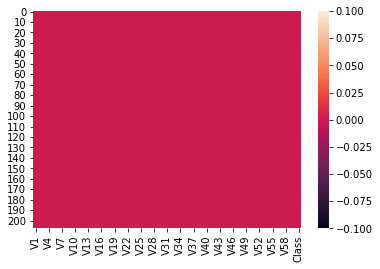

In [50]:
sns.heatmap(sonar.isnull())

In [51]:
sonar.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [52]:
sonarcor=sonar.corr()
sonarcor

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
V1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
V2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
V3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
V4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
V5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
V6,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
V7,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
V8,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
V9,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
V10,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


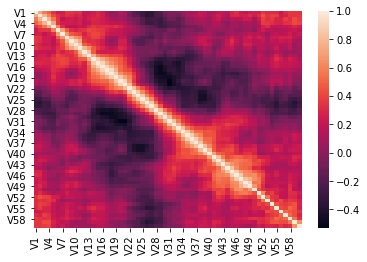

In [53]:
sns.heatmap(sonarcor)

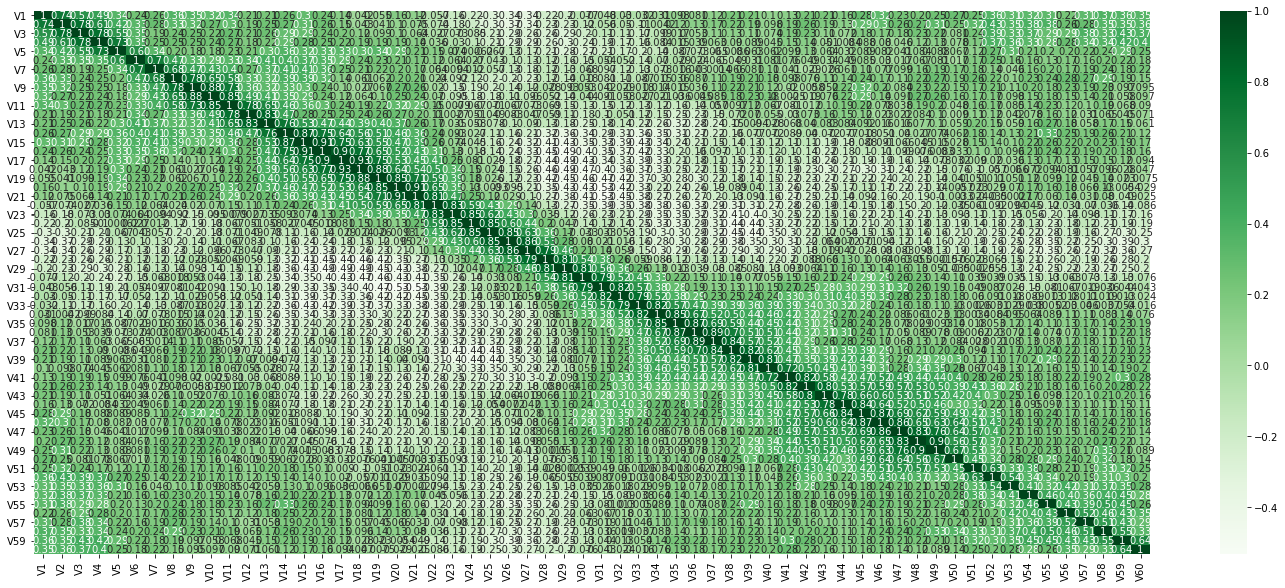

In [54]:
plt.figure(figsize=(25,10))
sns.heatmap(sonarcor,cmap="Greens",annot=True)

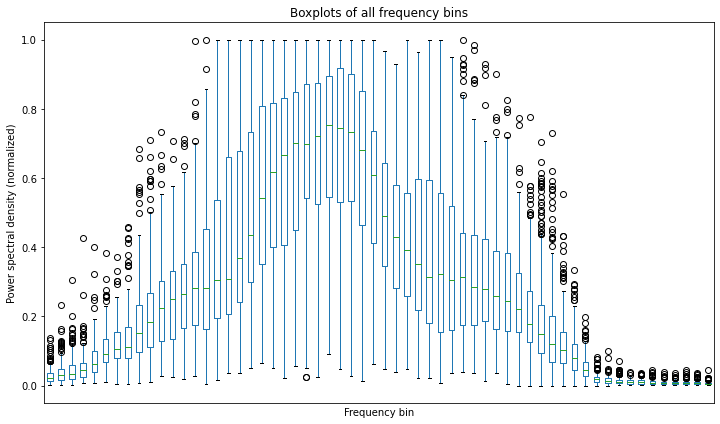

In [55]:
sonar.plot.box(figsize=(12,7), xticks=[])
plt.title('Boxplots of all frequency bins')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density (normalized)')
plt.show()

In [56]:
sonar['Class'].value_counts()

M    111
R     97
Name: Class, dtype: int64

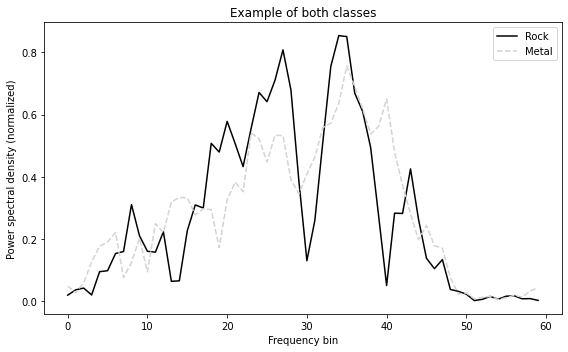

In [57]:
plt.figure(figsize=(8,5))
plt.plot(sonar[sonar['Class'] == 'R'].values[0][:-1], label='Rock', color='black')
plt.plot(sonar[sonar['Class'] == 'M'].values[0][:-1], label='Metal', color='lightgray', linestyle='--')
plt.legend()
plt.title('Example of both classes')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density (normalized)')
plt.tight_layout()
plt.show()

In [58]:
x=sonar.iloc[:,0:-1]

In [59]:
pca=PCA(n_components=12)

In [60]:
y=sonar.iloc[:,-1]
y=LabelEncoder().fit_transform(y)

In [61]:
xpca=pca.fit_transform(x)

In [62]:
x=xpca

In [63]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054,0.115546,-0.191408
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529,0.194461,-0.188529
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559,0.154054,-0.017024
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795,-0.336882,0.241950
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277,0.145586,-0.394497
...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.041781,-1.031644,0.265669,0.021516,-0.015439,0.097304,0.003784,0.177926,-0.027908,-0.264179,-0.090828,-0.135192
204,0.219149,-1.153807,0.203619,0.045836,0.183272,0.012770,0.078507,0.264831,0.070749,-0.303296,-0.037156,-0.112662
205,0.297733,-1.151860,0.250096,-0.057702,0.163566,0.015275,0.045792,0.225904,0.072130,-0.313044,-0.185144,-0.112556
206,-0.045761,-0.995970,0.199677,-0.066516,-0.147227,-0.084600,0.031038,0.067444,0.025771,-0.171120,-0.261023,-0.136402


In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scale=StandardScaler()

In [66]:
x=scale.fit_transform(x)

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=43)

In [68]:
lg=LogisticRegression()

In [69]:
lg.fit(x_train,y_train)

LogisticRegression()

In [70]:
pred=lg.predict(x_test)
print(pred)

[1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1
 0 0 1 1 1 1 0 0 0]


In [75]:
print("accuracy_score:",accuracy_score(y_test,pred))

accuracy_score: 0.8043478260869565


In [76]:
print(confusion_matrix(y_test,pred))

[[19  3]
 [ 6 18]]


In [77]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        22
           1       0.86      0.75      0.80        24

    accuracy                           0.80        46
   macro avg       0.81      0.81      0.80        46
weighted avg       0.81      0.80      0.80        46



In [95]:
svc=SVC(kernel='rbf')
svc.fit(x_train, y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

accuracy_score: 0.8478260869565217
[[20  2]
 [ 5 19]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.90      0.79      0.84        24

    accuracy                           0.85        46
   macro avg       0.85      0.85      0.85        46
weighted avg       0.85      0.85      0.85        46



In [82]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

In [83]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accurecy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accurecy score of LogisticRegression() is:
0.8043478260869565
[[19  3]
 [ 6 18]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        22
           1       0.86      0.75      0.80        24

    accuracy                           0.80        46
   macro avg       0.81      0.81      0.80        46
weighted avg       0.81      0.80      0.80        46



Accurecy score of GaussianNB() is:
0.7391304347826086
[[18  4]
 [ 8 16]]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        22
           1       0.80      0.67      0.73        24

    accuracy                           0.74        46
   macro avg       0.75      0.74      0.74        46
weighted avg       0.75      0.74      0.74        46



Accurecy score of SVC() is:
0.8478260869565217
[[20  2]
 [ 5 19]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1 

In [85]:
svc=svc=SVC(kernel='rbf')
from sklearn.model_selection import cross_val_score
svcscores=cross_val_score(svc, x , y, cv=5)
y_pred=cross_val_score(svc, x , y, cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.42857143 0.64285714 0.45238095 0.75609756 0.36585366]
0.5291521486643437 0.1463623862778364


In [86]:
dtc=DecisionTreeClassifier()
from sklearn.model_selection import cross_val_score
dtcscores=cross_val_score(dtc, x , y, cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.35714286 0.54761905 0.42857143 0.68292683 0.31707317]
0.4666666666666667 0.13352653066302925


In [87]:
knn=KNeighborsClassifier()
from sklearn.model_selection import cross_val_score
knnscores=cross_val_score(knn, x , y, cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.61904762 0.61904762 0.54761905 0.85365854 0.29268293]
0.586411149825784 0.17962880623923871


In [88]:
rfc=RandomForestClassifier()
from sklearn.model_selection import cross_val_score
rfcscores=cross_val_score(rfc, x , y, cv=5)
print(rfcscores)
print(rfcscores.mean(),rfcscores.std())

[0.38095238 0.66666667 0.4047619  0.75609756 0.29268293]
0.500232288037166 0.17865411718756383


In [91]:
adbc=AdaBoostClassifier()
from sklearn.model_selection import cross_val_score
adbcscores=cross_val_score(adbc, x , y, cv=5)
print(adbcscores)
print(adbcscores.mean(),adbcscores.std())

[0.4047619  0.76190476 0.38095238 0.75609756 0.43902439]
0.5485481997677119 0.17283291463910067


In [92]:
gbc=GradientBoostingClassifier()
from sklearn.model_selection import cross_val_score
gbcscores=cross_val_score(adbc, x , y, cv=5)
print(gbcscores)
print(gbcscores.mean(),gbcscores.std())

[0.4047619  0.76190476 0.38095238 0.75609756 0.43902439]
0.5485481997677119 0.17283291463910067


In [98]:
import joblib
joblib.dump(svc, 'svc_df.pkl')

['svc_df.pkl']